In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Content/Customer_lifetime_value.csv')

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df.shape

(9134, 24)

In [ ]:
df.isnull().sum()

,0
Customer,0
State,0
Customer Lifetime Value,0
Response,0
Coverage,0
Education,0
Effective To Date,0
EmploymentStatus,0
Gender,0
Income,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
print(df['State'].value_counts())
print(df['Gender'].value_counts())
df['EmploymentStatus'].value_counts()

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
Gender
F    4658
M    4476
Name: count, dtype: int64


,count
EmploymentStatus,
Employed,5698
Unemployed,2317
Medical Leave,432
Disabled,405
Retired,282


In [ ]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'])
df['Effective To Date'].to_timestamp

<bound method Series.to_timestamp of 0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: Effective To Date, Length: 9134, dtype: datetime64[ns]>

In [ ]:
lb=LabelEncoder()
df['Customer']=lb.fit_transform(df['Customer'])
df['State']=lb.fit_transform(df['State'])
df['Response']=lb.fit_transform(df['Response'])
df['Coverage']=lb.fit_transform(df['Coverage'])
df['Education']=lb.fit_transform(df['Education'])
df['EmploymentStatus']=lb.fit_transform(df['EmploymentStatus'])
df['Gender']=lb.fit_transform(df['Gender'])
df['Policy Type']=lb.fit_transform(df['Policy Type'])
df['Policy']=lb.fit_transform(df['Policy'])
df['Renew Offer Type']=lb.fit_transform(df['Renew Offer Type'])
df['Vehicle Class']=lb.fit_transform(df['Vehicle Class'])
df['Vehicle Size']=lb.fit_transform(df['Vehicle Size'])
df['Sales Channel']=lb.fit_transform(df['Sales Channel'])
df['Marital Status']=lb.fit_transform(df['Marital Status'])
df['Location Code']=lb.fit_transform(df['Location Code'])

In [ ]:
# Assuming 'Total Claim Amount' represents the CLV
# Calculate correlation with CLV
correlation_with_clv = df.corr()['Total Claim Amount'].sort_values(ascending=False)

# Select top features
top_features = correlation_with_clv.index[1:11]  # Exclude the CLV itself (index 0)
print("Top features correlated with Total Claim Amount:\n", top_features)

Top features correlated with Total Claim Amount:
 Index(['Monthly Premium Auto', 'EmploymentStatus', 'Coverage', 'Location Code',
       'Customer Lifetime Value', 'Marital Status', 'Vehicle Class', 'Gender',
       'Vehicle Size', 'Education'],
      dtype='object')


In [ ]:
new_df = df[top_features]
new_df

,Monthly Premium Auto,EmploymentStatus,Coverage,Location Code,Customer Lifetime Value,Marital Status,Vehicle Class,Gender,Vehicle Size,Education
0,69,1,0,1,2763.519279,1,5,0,1,0
1,94,4,1,1,6979.535903,2,0,0,1,0
2,108,1,2,1,12887.431650,1,5,0,1,0
3,106,4,0,1,7645.861827,1,3,1,1,0
4,73,1,0,0,2813.692575,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9129,73,1,0,2,23405.987980,1,0,1,1,0
9130,79,1,1,1,3096.511217,0,0,0,1,1
9131,85,4,1,1,8163.890428,2,0,1,1,0
9132,96,1,1,1,7524.442436,1,0,1,0,1


3.0322802599299847


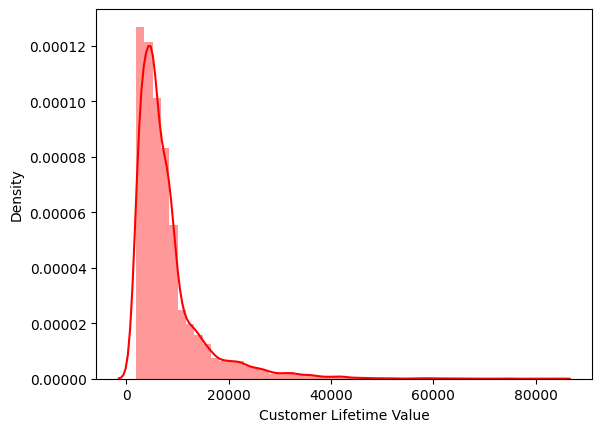

In [ ]:
print(new_df['Customer Lifetime Value'].skew())
sns.distplot(new_df['Customer Lifetime Value'], color='red')
# Show the plot
plt.show()

0.3915198518313467


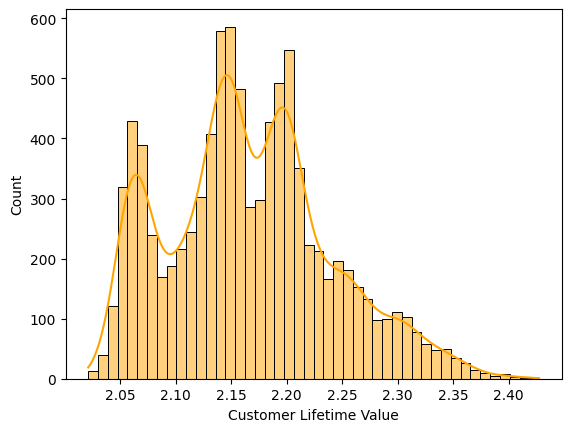

In [ ]:
new_df['Customer Lifetime Value']=np.log(new_df['Customer Lifetime Value'])
sns.histplot(new_df['Customer Lifetime Value'], color='orange', kde=True)
print(new_df['Customer Lifetime Value'].skew())

In [ ]:
# Instead of calculating skew and applying log transformation separately,
# combine them in a single step for clarity.

# Apply log transformation to 'Total Claim Amount' in the original dataframe (df)
df['Total Claim Amount'] = np.log(df['Total Claim Amount'])

# Now calculate the skew
skew_value = df['Total Claim Amount'].skew()
print(f"Skewness of 'Total Claim Amount': {skew_value}")

# Proceed with creating new_df using top features (if needed)
# Make sure to include 'Total Claim Amount' if you intend to use it further
top_features = correlation_with_clv.index[0:11] # Include 'Total Claim Amount'
new_df = df[top_features]

Skewness of 'Total Claim Amount': -1.9200328840780618


In [ ]:
# Splitting the data
X=new_df.drop(columns='Customer Lifetime Value',axis=1)
Y=new_df['Customer Lifetime Value']

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)
print(xtrain.shape)
print(xtest.shape)

(6393, 10)
(2741, 10)


In [ ]:
# Fit the linear regression model to the training data
model=LinearRegression()
model.fit(xtrain,ytrain)
print("Model :",model)

# Make predictions
prediction = model.predict(xtest)
print("Predicted Values :",prediction)

# Model Evaluation
acc = r2_score(ytest,prediction)*100
mae=mean_absolute_error(ytest,prediction)
mse=mean_squared_error(ytest,prediction)

Model : LinearRegression()
Predicted Values : [6607.38553329 5882.0349466  9909.2205925  ... 9336.73483372 7079.84833372
 6272.97259802]


In [ ]:
# Print evaluation metrics
print(f"R2 score : {acc:.2f}")
print(f"Mean Absolute error {mae:.2f}")
print(f"Mean Squared error {mse:.2f}")

R2 score : 12.55
Mean Absolute error 3878.22
Mean Squared error 38161834.65


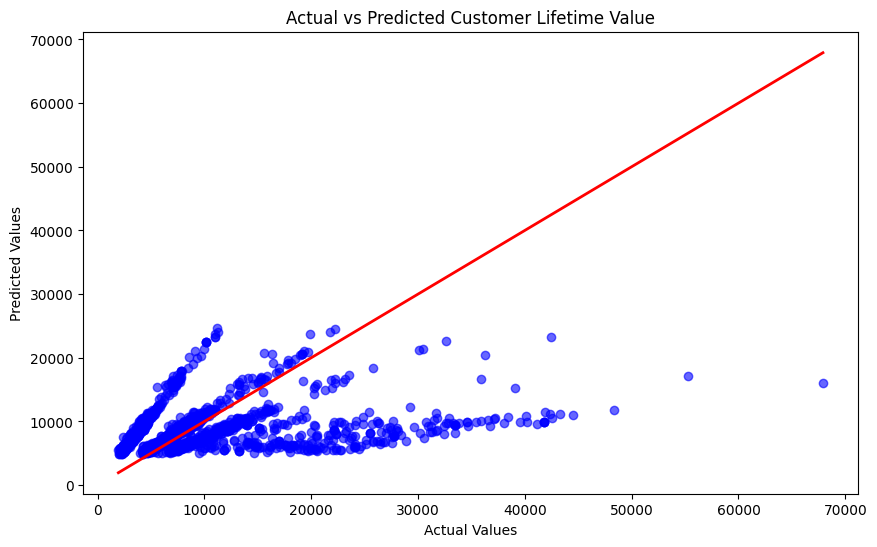

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, prediction, color='blue', alpha=0.6)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linewidth=2)
plt.title('Actual vs Predicted Customer Lifetime Value')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()